<a href="https://colab.research.google.com/github/harrisontg57/NLP_Spring_2021/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tim Harrison
Exam 1
Student ID: 002-24-5948

In [55]:
#Handling file imports here and creating dataframes
from os import walk
import numpy as np
import random
import re
random.seed(12345)

_, _, filenames_neg = next(walk("TRAINING/negative"))
_, _, filenames_pos = next(walk("TRAINING/positive"))
#print(filenames_neg[0:10])
ones = [1] * len(filenames_pos)
zeroes = [0] * len(filenames_neg)
pos_txt = []
for name in filenames_pos:
  with open('/content/TRAINING/positive/'+name, 'r') as file:
      d = file.read().replace('\n', ' ')
      #removing those html tags
      re.sub('<.*?>', ' ', d)
      pos_txt.append(d)
df_pos = pd.DataFrame(data={'text': pos_txt, 'sentiment': ones})
neg_txt = []
for name in filenames_neg:
  with open('/content/TRAINING/negative/'+name, 'r') as file:
      d = file.read().replace('\n', ' ')
      neg_txt.append(d)
df_neg = pd.DataFrame(data={'text': neg_txt, 'sentiment': zeroes})

#df_neg.sample(frac=0.75,random_state=12345)

data = df_pos.append(df_neg)
#data.sample(frac=0.75,random_state=12345)

Question 1)

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, FeatureUnion

def create_model(alg_name, vectorization, train):
  if alg_name == "naive_bayes":
    learn = MultinomialNB()
  elif alg_name == "perceptron":
    learn = Perceptron()
  elif alg_name == "logistic_regression":
    learn = LogisticRegression()
  elif alg_name == "random_forest":
    learn = RandomForestClassifier()
  elif alg_name == "svm":
    learn = SVC()
  else:
    raise NameError('incorrect algorithm name')

  if vectorization == "tfidf":
    vect = TfidfVectorizer()
  elif vectorization == "bag_of_words":
    vect = CountVectorizer()
  elif vectorization == "both":
    vect = FeatureUnion([("tfidf", TfidfVectorizer()), ("bag_of_words", CountVectorizer())])
  else:
    raise NameError('incorrect vectorization name')
  
  model = make_pipeline(vect, learn)
  model.fit(train.text, train.sentiment)
  return model


Question 2)

In [57]:
from sklearn.model_selection import train_test_split
train_a, test_a = train_test_split(data, test_size=0.25,random_state=12345)
model_a = create_model("naive_bayes","both",train_a)

train_b, test_b = train_test_split(data, test_size=0.30,random_state=12345)
model_b = create_model("random_forest","both",train_b)

train_c, test_c = train_test_split(data, test_size=0.40,random_state=12345)
model_c = create_model("svm","both",train_c)


Question 3)

A) Model A (naive bayes) performs best in all metrics except recall

B) Mixing up testing sets 

In [58]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
labels_a = model_a.predict(test_a.text)
results_a = pd.DataFrame(data={'text': test_a.text, 'true_sentiment': test_a.sentiment, 'modeled_sentiment': labels_a})

scores_a = pd.DataFrame(data={'model': 'model_a', 'training_portion': [0.75], 'test_portion': [0.25], 'accuracy':accuracy_score(test_a.sentiment,labels_a),'precision':precision_score(test_a.sentiment,labels_a),'recall':recall_score(test_a.sentiment,labels_a),'f1-score':f1_score(test_a.sentiment,labels_a)})


labels_b = model_b.predict(test_b.text)
results_b = pd.DataFrame(data={'text': test_b.text, 'true_sentiment': test_b.sentiment, 'modeled_sentiment': labels_b})

scores_b = pd.DataFrame(data={'model': 'model_b', 'training_portion': [0.70], 'test_portion': [0.30], 'accuracy':accuracy_score(test_b.sentiment,labels_b),'precision':precision_score(test_b.sentiment,labels_b),'recall':recall_score(test_b.sentiment,labels_b),'f1-score':f1_score(test_b.sentiment,labels_b)})


labels_c = model_c.predict(test_c.text)
results_c = pd.DataFrame(data={'text': test_c.text, 'true_sentiment': test_c.sentiment, 'modeled_sentiment': labels_c})

scores_c = pd.DataFrame(data={'model': 'model_c', 'training_portion': [0.60], 'test_portion': [0.40], 'accuracy':accuracy_score(test_c.sentiment,labels_c),'precision':precision_score(test_c.sentiment,labels_c),'recall':recall_score(test_c.sentiment,labels_c),'f1-score':f1_score(test_c.sentiment,labels_c)})

scores = scores_a.append(scores_b)
scores = scores.append(scores_c)
scores

,model,training_portion,test_portion,accuracy,precision,recall,f1-score
0,model_a,0.75,0.25,0.861264,0.856828,0.915294,0.885097
0,model_b,0.70,0.30,0.805269,0.778878,0.929134,0.847397
0,model_c,0.60,0.40,0.743127,0.732034,0.883824,0.800799


Question 4)

Question 5)

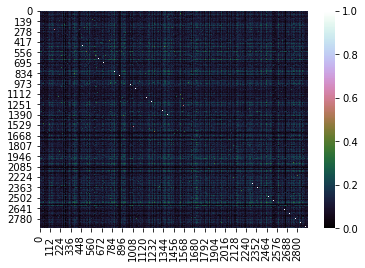

In [60]:
#reusing my code from homework 2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

vect = TfidfVectorizer()
vector_matrix = vect.fit_transform(data['text'])
cosine_similarity_matrix = cosine_similarity(vector_matrix)
#print(cosine_similarity_matrix)
sns.heatmap(cosine_similarity_matrix,cmap=sns.color_palette("cubehelix", as_cmap=True))

Question 6)

Question 7)
The results are 35996 Negative Verbs with 54429 Negative Nouns and 45610 Positive Verbs with 72895 Positive Nouns. 

(NOTE: this took a while to compute so I've limited the code to the first 250 positive comments and first 250 negative comments) 

The positive comments have significantly more verbs and nouns.  However the ratios of verbs to nouns are similar in both positive and negative reviews, so I suspect this is simply due to people wanting to write more about movies they enjoyed.

In [69]:
import spacy
nlp = spacy.load("en_core_web_sm")
#en_core_web_sm should be perfect for our short movie reviews.
nouns_neg = 0
verbs_neg = 0
for comment in neg_txt[0:250]: #Remove the '[0:250]' for complete analysis
  sentences = comment.split('.')
  for s in sentences:
    sentence = nlp(s)
    for t in sentence:
      if t.pos_ == "NOUN":
        nouns_neg += 1
      if t.pos_ == "VERB":
        verbs_neg += 1
print(verbs_neg)
print(nouns_neg)

nouns_pos = 0
verbs_pos = 0
for comment in pos_txt[0:250]: #Remove the '[0:250]' for complete analysis
  sentences = comment.split('.')
  for s in sentences:
    sentence = nlp(s)
    for t in sentence:
      if t.pos_ == "NOUN":
        nouns_pos += 1
      if t.pos_ == "VERB":
        verbs_pos += 1

print(verbs_pos)
print(nouns_pos)

35996
54429
45610
72895


In [70]:
print(35996/54429)
print(45610/72895)

0.6613386246302523
0.6256944920776459


Question 8)

In [82]:
import spacy
nlp = spacy.load("en_core_web_sm")
punct = {}
for comment in neg_txt[0:100]: #Remove the '[0:250]' for complete analysis
  s = nlp(comment)
  for t in s:
    if t.pos_ == "PUNCT":
      if t in punct:
        punct[t] += 1
      else:
        punct[t] = 1
for comment in pos_txt[0:100]: #Remove the '[0:250]' for complete analysis
  s = nlp(comment)
  for t in s:
    if t.pos_ == "PUNCT":
      if t in punct:
        punct[t] += 1
      else:
        punct[t] = 1